# Predicting Survivors on Titanic

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
raw_data = pd.read_csv('train.csv')
raw_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
raw_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# There are some null values in Cabin and Age
# We need to fix that
# For now, we can simply drop all the null rows
raw_data = raw_data.dropna()
raw_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [6]:
raw_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


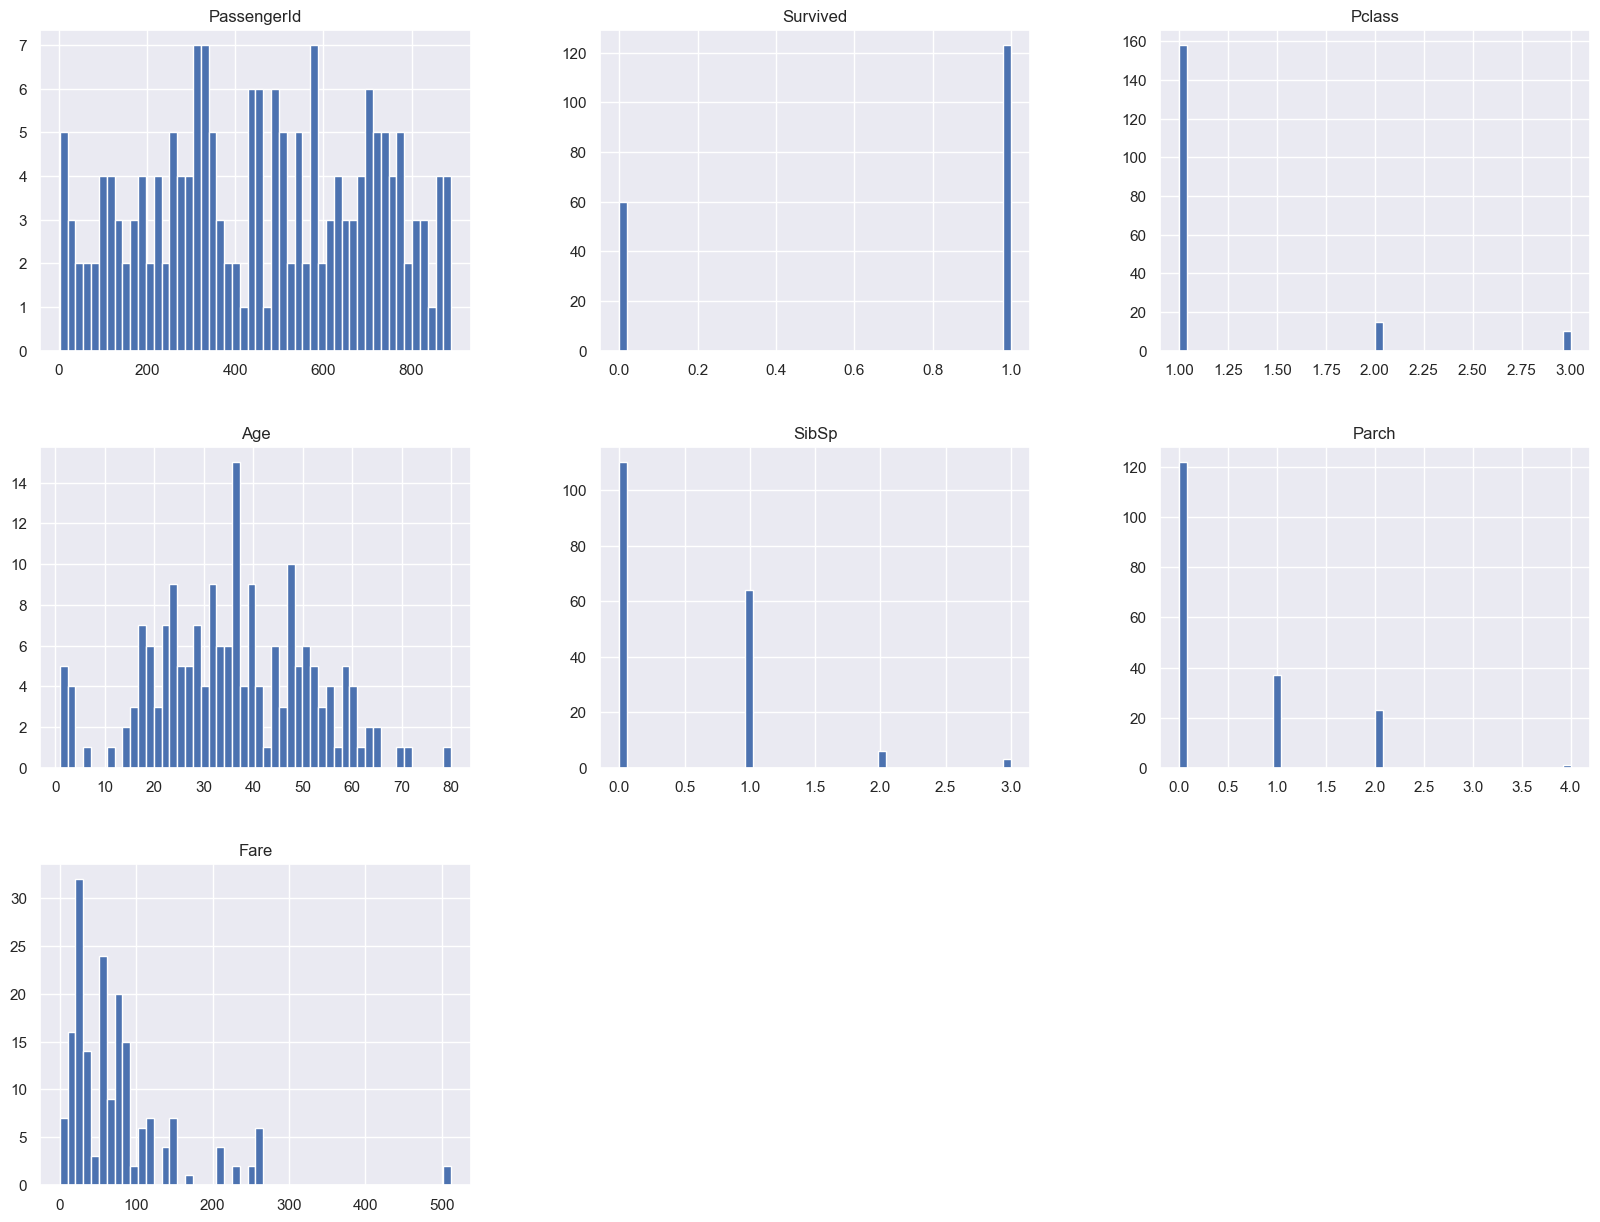

In [7]:
raw_data.hist(bins=50, figsize=(20, 15))
plt.show()

In [8]:
raw_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
# In order to make sure we can apply the same transformations everytime, we can make a pipeline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

pre_raw_data = raw_data.copy()
pre_raw_data = pre_raw_data.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis=1)

y = pre_raw_data['Survived']
X = pre_raw_data.drop('Survived', axis=1)

cat_attributes = ['Pclass', 'Embarked', 'SibSp', 'Sex']

num_attributes = X.copy()
for cat_attrib in cat_attributes:
    num_attributes = num_attributes.drop(cat_attrib, axis=1)

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

num_attributes = list(num_attributes)

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attributes),
    ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attributes)
])

X_prepared = full_pipeline.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_prepared, y, test_size=0.2, random_state=42
)

## Training the Model

In [11]:
from sklearn.metrics import accuracy_score

def display_model_accuracy(model):
    predictions = model.predict(X_train)
    acc = accuracy_score(y_train, predictions)
    print("Train Accuracy:", acc)

def display_model_accuracy_test(model):
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    print("Test Accuracy:", acc)

In [12]:
# Lets try the Logistic Regression first
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [13]:
display_model_accuracy(log_reg)
display_model_accuracy_test(log_reg)

Train Accuracy: 0.773972602739726
Test Accuracy: 0.7567567567567568


Seems like we have quite a high accuracy here, but nothing great. A 75.6% accuracy is good for the first submission, but I will come work on this in the future.

In [14]:
# Lets write the code for the submission
def write_submission_csv(model, filename="submission.csv"):
    # Load original test data
    test_raw = pd.read_csv("test.csv")

    # Save PassengerId before dropping
    passenger_ids = test_raw["PassengerId"]

    # Drop unused columns (same as training)
    test_data = test_raw.drop(["Name", "PassengerId", "Ticket", "Cabin"], axis=1)

    # Apply same pipeline (assumes full_pipeline is already fit on training data)
    X_final_test = full_pipeline.transform(test_data)

    # Predict using the trained model
    predictions = model.predict(X_final_test)

    # Create submission DataFrame
    submission_df = pd.DataFrame({
        "PassengerId": passenger_ids,
        "Survived": predictions.astype(int)
    })

    # Write to CSV
    submission_df.to_csv(filename, index=False)
    print(f"Submission file '{filename}' created with {len(submission_df)} entries.")


In [15]:
write_submission_csv(log_reg)

Submission file 'submission.csv' created with 418 entries.


Ok, so this model got us only 0.71 accuracy. Need to work on this.

## Trying out other models

Let's try some ensemble methods first.

In [16]:
from sklearn.ensemble import RandomForestClassifier

forest_class = RandomForestClassifier()
forest_class.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
display_model_accuracy(forest_class)
display_model_accuracy_test(forest_class)

Train Accuracy: 1.0
Test Accuracy: 0.6756756756756757


Seems like while it does have full accuracy on the train set, it only has an accuracy of 0.676 for the test set. This means that it has terribly overfitted the data, and is not our wanted model.

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_class = GradientBoostingClassifier()
gradient_class.fit(X_train, y_train)

GradientBoostingClassifier()

In [19]:
display_model_accuracy(gradient_class)
display_model_accuracy_test(gradient_class)

Train Accuracy: 1.0
Test Accuracy: 0.8378378378378378


WOAH. Finally, an accuracy of 0.838, which is already better than our logistic regression. Let's try some other methods and try to shoot for the 100% accuracy.

In [21]:
# Lets use xgboost algorithms
from xgboost import XGBClassifier

xgb_class = XGBClassifier()
xgb_class.fit(X_train, y_train)

display_model_accuracy(xgb_class)
display_model_accuracy_test(xgb_class)

Train Accuracy: 1.0
Test Accuracy: 0.6486486486486487


Ok, so far it seems Gradient Boosting is the best, but let's just check to make sure it's the best by using cross validation.

In [24]:
from sklearn.model_selection import cross_val_score

def display_cross_val_score(model):
    print()
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    print(f"Cross-Validation Scores ({5} folds): {np.round(scores, 4)}")
    print(f"Mean Accuracy: {scores.mean():.4f}")
    print(f"Standard Deviation: {scores.std():.4f}")
    print('\n')

In [25]:
print('Logistic Regression')
display_cross_val_score(log_reg)
print('Random Forest Classifier')
display_cross_val_score(forest_class)
print('Gradient Boosting Algorithm')
display_cross_val_score(gradient_class)
print('XGB Classifier')
display_cross_val_score(xgb_class)

Logistic Regression

Cross-Validation Scores (5 folds): [0.7333 0.7586 0.7241 0.7586 0.6897]
Mean Accuracy: 0.7329
Standard Deviation: 0.0256


Random Forest Classifier

Cross-Validation Scores (5 folds): [0.8    0.7931 0.7241 0.7241 0.7241]
Mean Accuracy: 0.7531
Standard Deviation: 0.0355


Gradient Boosting Algorithm

Cross-Validation Scores (5 folds): [0.7333 0.8966 0.6207 0.7241 0.7241]
Mean Accuracy: 0.7398
Standard Deviation: 0.0886


XGB Classifier

Cross-Validation Scores (5 folds): [0.8333 0.7931 0.7241 0.7241 0.7241]
Mean Accuracy: 0.7598
Standard Deviation: 0.0455




Ok, so it seems like the accuracy is actually pretty similar across all my algorithms. This is concerning.

Ok for now, I will try submitting the Gradient Boosting Algorithm, just to check it out. Right now, it seems that my data is the bottleneck, so tomorrow I will try to feature engineer better.

In [26]:
write_submission_csv(gradient_class, filename='submission-2.csv')

Submission file 'submission-2.csv' created with 418 entries.
